### Load Dataset

In [54]:
import pandas as pd

df = pd.read_excel('../data/insurance_remed.xlsx')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,2025-09-27 00:00:00,0,yes,southwest,16884924
1,18,male,33.77,1,no,southeast,17255523
2,28,male,33,3,no,southeast,4449462
3,33,male,22705,0,no,northwest,2198447061
4,32,male,28.88,0,no,northwest,38668552


In [55]:
# Mengecek ukuran dataset (jumlah baris dan kolom)
print("Ukuran Dataset (baris, kolom): ", df.shape)

# Mengecek jumlah total elemen dalam dataset
print("Jumlah total elemen dalam dataset : ", df.size)

Ukuran Dataset (baris, kolom):  (1340, 7)
Jumlah total elemen dalam dataset :  9380


In [56]:
#Mengecek tipe data dari sebuah variabel
my_variable = "Hello"
print("Tipe data my_variable: ", type(my_variable))

my_number = 123
print("Tipe data my_number: ", type(my_number))

#Mengecek tipe data dari setiap kolom dalam DataFrame
print("\nTipe data dari setiap kolom dalam DataFrame:")
print(df.dtypes)

Tipe data my_variable:  <class 'str'>
Tipe data my_number:  <class 'int'>

Tipe data dari setiap kolom dalam DataFrame:
age          int64
sex         object
bmi         object
children     int64
smoker      object
region      object
charges     object
dtype: object


In [57]:
# mencari nilai yang hilang
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang di setiap kolom: ")
print(missing_values)

Jumlah nilai yang hilang di setiap kolom: 
age         0
sex         0
bmi         2
children    0
smoker      0
region      0
charges     1
dtype: int64


In [58]:
#Hitung jumlah baris duplikat
duplicate_rows_count = df.duplicated().sum()

#Cetak jumlah baris duplikat
print(f"Jumlah baris duplikat: {duplicate_rows_count}")

#Jika ada baris duplikat, tampilkan beberapa baris duplikat pertama
if duplicate_rows_count > 0:
    print("\nBeberapa baris duplikat pertama:")
    print(df[df.duplicated(keep=False)].head())

Jumlah baris duplikat: 3

Beberapa baris duplikat pertama:
      age     sex                  bmi  children smoker     region   charges
0      19  female  2025-09-27 00:00:00         0    yes  southwest  16884924
1      18    male                33.77         1     no  southeast  17255523
195    19    male                30.59         0     no  northwest  16395631
581    19    male                30.59         0     no  northwest  16395631
1338   19  female  2025-09-27 00:00:00         0    yes  southwest  16884924


### Cleaning Data

In [59]:
# Konversi semua kolom ke numerik
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['bmi'] = pd.to_numeric(df['bmi'], errors='coerce')
df['children'] = pd.to_numeric(df['children'], errors='coerce')
df['charges'] = pd.to_numeric(df['charges'], errors='coerce')

In [60]:
# Membersihkan nama kolom agar tidak typo
df['sex'] = df['sex'].str.lower().str.strip()
df['smoker'] = df['smoker'].str.lower().str.strip()
df['region'] = df['region'].str.lower().str.strip()

In [61]:
# Buang BMI anomali (10–60)
df.loc[df['bmi'] > 100, 'bmi'] = None
df.loc[df['bmi'] < 10, 'bmi'] = None

# Buang charges terlalu besar
df.loc[df['charges'] > 340000000, 'charges'] = None
df.loc[df['charges'] < 0, 'charges'] = None

In [62]:
# mengecek kembali nilai yang hilang
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang di setiap kolom: ")
print(missing_values)

Jumlah nilai yang hilang di setiap kolom: 
age           0
sex           0
bmi         548
children      0
smoker        0
region        0
charges     420
dtype: int64


In [63]:
# Mengecek nilai tengah-tengah (median)
bmi_median = df['bmi'].median()
charges_median = df['charges'].median()

# Menampilkan Output median tiap kolom
print("Median BMI:", bmi_median)
print("Median Charges:", charges_median)

# Menambahkan nilai median ke data yang hilang dikolom bmi & charges
df['bmi'] = df['bmi'].fillna(bmi_median)
df['charges'] = df['charges'].fillna(charges_median)

Median BMI: 32.67
Median Charges: 37345449.0


In [64]:
# mengecek kembali nilai yang hilang
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang di setiap kolom: ")
print(missing_values)

Jumlah nilai yang hilang di setiap kolom: 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [65]:
# Hitung jumlah baris duplikat
duplicate_rows_count = df.duplicated().sum()

# Cetak jumlah baris duplikat
print(f"\nJumlah baris duplikat: {duplicate_rows_count}")

# Jika ada baris duplikat, hapus baris duplikat tersebut
if duplicate_rows_count > 0:
    print("\nMenghapus baris duplikat...")
    df = df.drop_duplicates()
    print("Baris duplikat telah dihapus.")

# Verifikasi bahwa tidak ada baris duplikat lagi
duplicate_rows_count_after = df.duplicated().sum()
print(f"\nJumlah baris duplikat setelah penghapusan: {duplicate_rows_count_after}")

# Tampilkan beberapa baris pertama dari DataFrame yang telah dibersihkan
if duplicate_rows_count > 0:
    print("\nBeberapa baris pertama dari DataFrame setelah pembersihan:")
    display(df.head())


Jumlah baris duplikat: 32

Menghapus baris duplikat...
Baris duplikat telah dihapus.

Jumlah baris duplikat setelah penghapusan: 0

Beberapa baris pertama dari DataFrame setelah pembersihan:


,age,sex,bmi,children,smoker,region,charges
0,19,female,32.67,0,yes,southwest,16884924.0
1,18,male,33.77,1,no,southeast,17255523.0
2,28,male,33.00,3,no,southeast,4449462.0
3,33,male,32.67,0,no,northwest,37345449.0
4,32,male,28.88,0,no,northwest,38668552.0


### Eksplorasi Data

In [66]:
# Indenifikasi kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns

print("Memeriksa nilai unik dan distribusi untuk kolom kategorikal:")
for col in categorical_cols:
    print(f"\nKolom: {col}")
    print(df[col].value_counts())

# Identifikasi kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nMemeriksa statistik deskriptif untuk kolom numerik:")
display(df[numerical_cols].describe())

Memeriksa nilai unik dan distribusi untuk kolom kategorikal:

Kolom: sex
sex
male      655
female    653
Name: count, dtype: int64

Kolom: smoker
smoker
no     1038
yes     270
Name: count, dtype: int64

Kolom: region
region
southeast    364
southwest    325
northwest    317
northeast    302
Name: count, dtype: int64

Memeriksa statistik deskriptif untuk kolom numerik:


,age,bmi,children,charges
count,1308.000000,1308.000000,1308.000000,1.308000e+03
mean,39.071865,32.523119,1.104740,5.872644e+07
std,14.007301,4.782002,1.209074,6.683475e+07
min,18.000000,15.960000,0.000000,1.242260e+03
25%,26.000000,31.540000,0.000000,1.633732e+07
50%,39.000000,32.670000,1.000000,3.734545e+07
75%,51.000000,33.777500,2.000000,6.795358e+07
max,64.000000,53.130000,5.000000,3.393356e+08


### Mencari Outlier

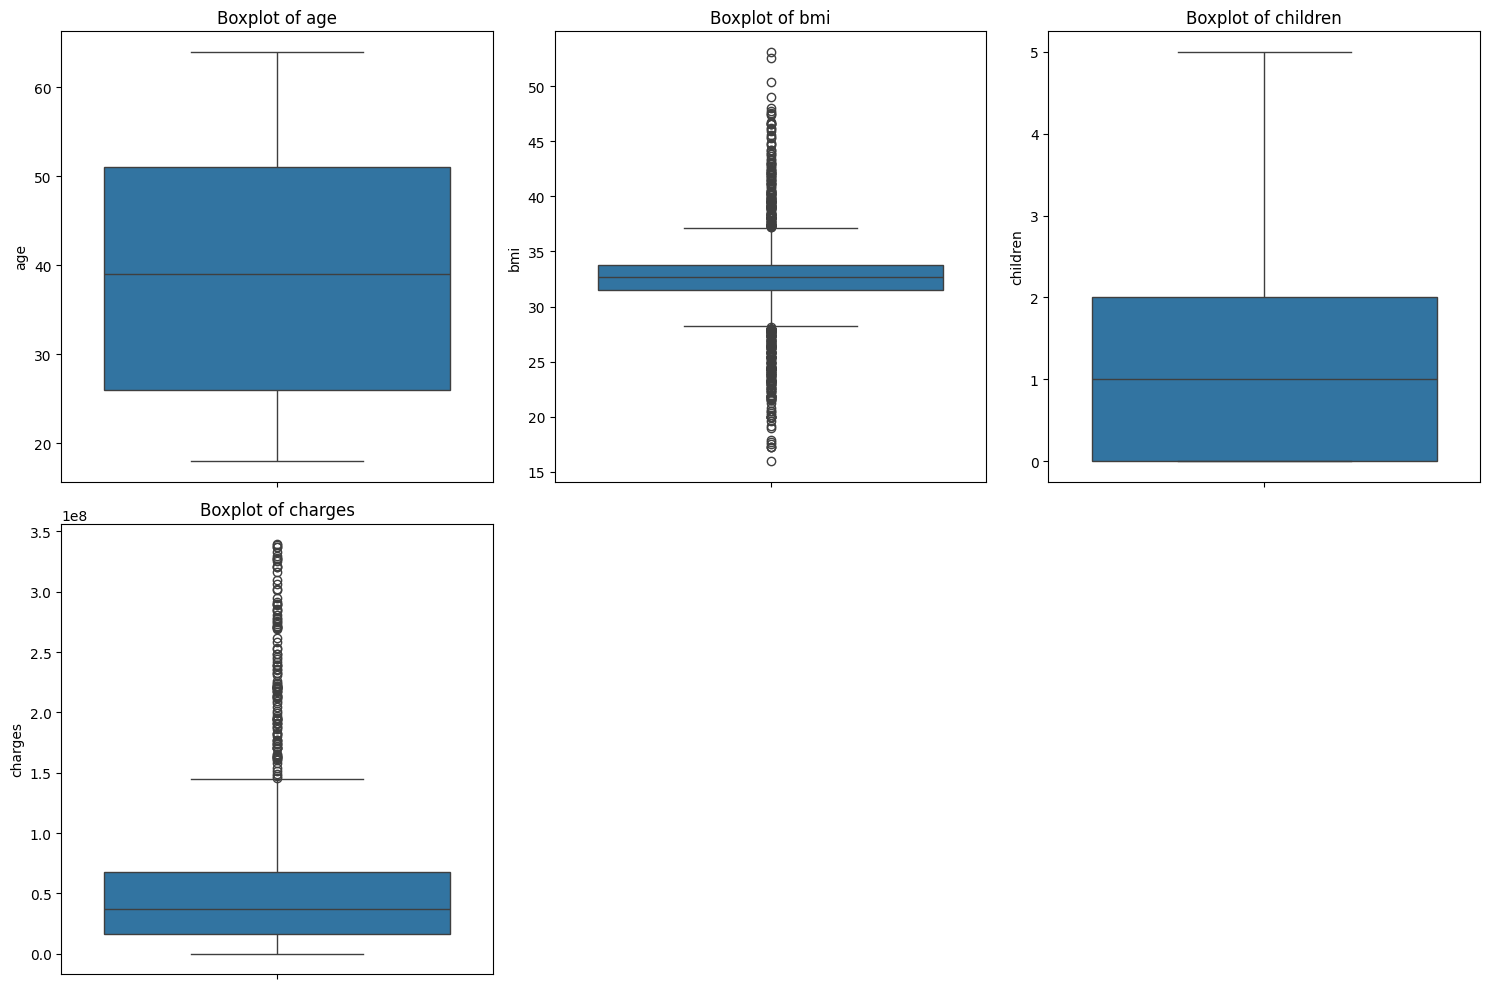

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik (tanpa id)
numerical_cols = ['age', 'bmi', 'children',
                  'charges']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Untuk mengembalikan skala nilai dengan cara dibagi 10000
df['charges'] = df['charges'] / 10000

df_clean = df.copy()

# Kolom yang ingin dibersihkan — biasanya hanya charges dan bmi
cols = ['bmi', 'charges']

for col in cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

df_clean.shape

(790, 7)

### Save Data bersih sebagai CSV

In [69]:
output_file_name = 'Data_bersih2.csv'
df.to_csv(output_file_name, index=False)

print(F"DataFrame telah berhasil disimpan ke dalam file '{output_file_name}'")

DataFrame telah berhasil disimpan ke dalam file 'Data_bersih2.csv'
